<a href="https://colab.research.google.com/github/Eugeg94/PrimeraEntrega-Gonzalez.ipynb/blob/main/Desafio_EvaluacionML_%2BMARIAEUGENIA_%2BGonzalez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import requests
import seaborn as sns
import numpy
import sklearn
%pip install scipy
!pip install matplotlib-venn
from plotnine.data import mpg
from plotnine import ggplot, aes, labs, geom_point

#INTRODUCCIÓN


**Contexto empresarial.** WBL son  informes semestrales que miden las diferencias de género en la ley. Los puntajes del índice WBL se basan en el promedio de los puntajes de cada economía para los 8 temas incluidos en el puntaje agregado de este año. Una puntuación más alta indica más leyes de igualdad de género, desde la perspectiva de la movilidad, maternidad, pago, emprendedurismo, matrimonio, etc
Nos planteamos distintas hipotesis a desarrollar.
Desde el Banco Mundial han solicitado un análisis del desarrollo de los Derechos de Mujeres a nivel mundial, para así lograr marcar el campo de acciones presentes y futuras para llegar a una verdadera igualdad.

**Problema comercial.** La tarea consiste en manipular y analizar los datos proporcionados y por medio de  visualizaciones responder  las preguntas específicas, que se mencionan a continuación.

**Contexto analítico.** Se le proporciona un archivo Excel y  Realizará las siguientes tareas con los datos:

1. Leer, transformar y preparar datos para su visualización
2. Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.
        
El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Deberá proporcionar visualizaciones para acompañar estos:

1. ¿Que paises son los que han evolucionado más en el campo de Derechos de Mujeres?
2. ¿Tiene relación la clase social con el Desarrollo de Derechos?
3. Con respecto a la movilidad ¿Las mujeres han ganado más derechos?
4. ¿Tienen los hombres y las mujeres los mismos derechos de propiedad sobre los bienes inmuebles?
5. Con respecto a la Libertad Economica ¿Ha habido una evolución favorecedora?  
6. ¿La edad a la que hombres y mujeres pueden jubilarse con pensión completa es la misma?


# Obtención de Datos

Se ha solicitado un analisis de los indices WBL que se adjuntarán desde el drive.

In [2]:
df1= pd.read_excel("/content/drive/MyDrive/Datasetwl.xlsx")

#  FEATURING de Datos

In [3]:
df1.head()

,Economy,Economy Code,ISO Code,Region,Income Group,Report Year,WBL INDEX,MOBILITY,Can a woman choose where to live in the same way as a man?,Can a woman travel outside her home in the same way as a man?,...,Do men and women have equal ownership rights to immovable property?,Do sons and daughters have equal rights to inherit assets from their parents?,Do male and female surviving spouses have equal rights to inherit assets?,Does the law grant spouses equal administrative authority over assets during marriage?,Does the law provide for the valuation of nonmonetary contributions?,PENSION,Is the age at which men and women can retire with full pension benefits the same?,Is the age at which men and women can retire with partial pension benefits the same?,Is the mandatory retirement age for men and women the same?,Are periods of absence due to childcare accounted for in pension benefits?
0,Afghanistan,AFG,AFG,South Asia,Low income,1971,26.25,25,No,No,...,Yes,No,No,Yes,No,25,No,No,Yes,No
1,Afghanistan,AFG,AFG,South Asia,Low income,1972,26.25,25,No,No,...,Yes,No,No,Yes,No,25,No,No,Yes,No
2,Afghanistan,AFG,AFG,South Asia,Low income,1973,26.25,25,No,No,...,Yes,No,No,Yes,No,25,No,No,Yes,No
3,Afghanistan,AFG,AFG,South Asia,Low income,1974,26.25,25,No,No,...,Yes,No,No,Yes,No,25,No,No,Yes,No
4,Afghanistan,AFG,AFG,South Asia,Low income,1975,26.25,25,No,No,...,Yes,No,No,Yes,No,25,No,No,Yes,No


In [4]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Report Year,10070.0,1997.000000,15.297818,1971.0,1984.000,1997.000,2010.000,2023.0
WBL INDEX,10070.0,59.725919,18.624405,17.5,46.875,59.375,73.125,100.0
MOBILITY,10070.0,82.142502,25.734132,0.0,75.000,100.000,100.000,100.0
WORKPLACE,10070.0,43.083416,33.698891,0.0,25.000,25.000,75.000,100.0
PAY,10070.0,47.656405,31.274515,0.0,25.000,50.000,75.000,100.0
MARRIAGE,10070.0,61.813307,29.891865,0.0,40.000,80.000,80.000,100.0
PARENTHOOD,10070.0,34.975174,30.636223,0.0,0.000,20.000,60.000,100.0
Length of paid maternity leave,10070.0,85.440020,62.109872,0.0,60.000,84.000,101.000,635.0
Length of paid paternity leave,10070.0,1.747865,6.840542,0.0,0.000,0.000,0.000,180.0
Shared days,10070.0,38.561867,159.929592,0.0,0.000,0.000,0.000,1460.0


In [5]:
df1.shape

(10070, 55)

In [6]:
df1.describe()

,Report Year,WBL INDEX,MOBILITY,WORKPLACE,PAY,MARRIAGE,PARENTHOOD,Length of paid maternity leave,Length of paid paternity leave,Shared days,Days for the mother,Days for the father,ENTREPRENEURSHIP,ASSETS,PENSION
count,10070.000000,10070.000000,10070.000000,10070.000000,10070.000000,10070.000000,10070.000000,10070.000000,10070.000000,10070.000000,10070.000000,10070.000000,10070.000000,10070.000000,10070.000000
mean,1997.000000,59.725919,82.142502,43.083416,47.656405,61.813307,34.975174,85.440020,1.747865,38.561867,5.271500,3.681529,72.715988,73.769613,61.650943
std,15.297818,18.624405,25.734132,33.698891,31.274515,29.891865,30.636223,62.109872,6.840542,159.929592,40.535523,27.854897,21.231145,29.200465,28.975416
min,1971.000000,17.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1984.000000,46.875000,75.000000,25.000000,25.000000,40.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,75.000000,40.000000,25.000000
50%,1997.000000,59.375000,100.000000,25.000000,50.000000,80.000000,20.000000,84.000000,0.000000,0.000000,0.000000,0.000000,75.000000,80.000000,75.000000
75%,2010.000000,73.125000,100.000000,75.000000,75.000000,80.000000,60.000000,101.000000,0.000000,0.000000,0.000000,0.000000,75.000000,100.000000,75.000000
max,2023.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,635.000000,180.000000,1460.000000,1095.000000,365.000000,100.000000,100.000000,100.000000


## 1.¿Que paises son los que han evolucionado más en el campo de Derechos de Mujeres?

Text(0.5, 0, 'Region')

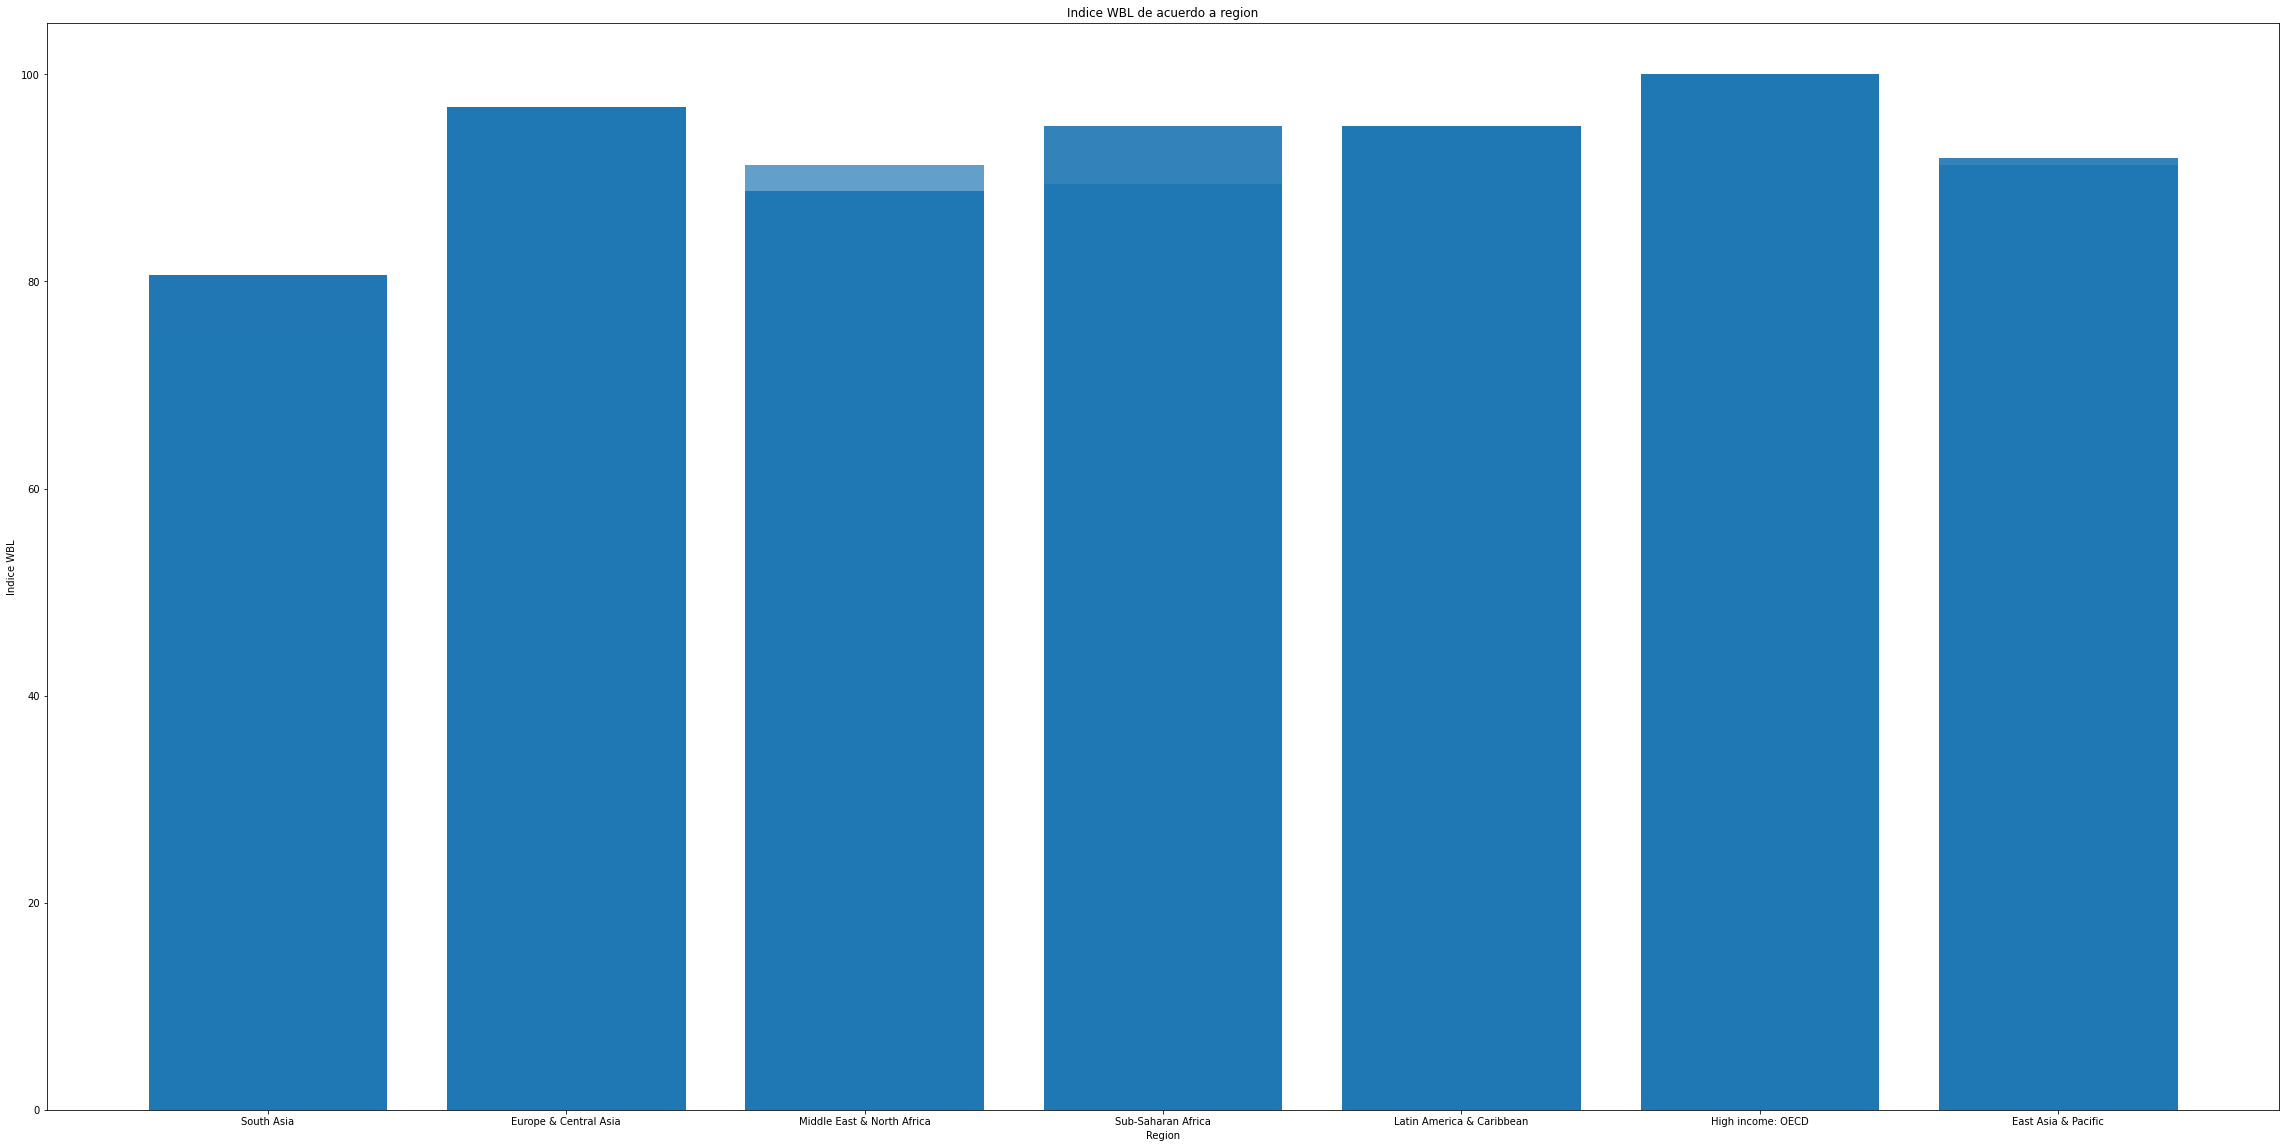

In [ ]:
fig, ax = plt.subplots(figsize=(40,20))
ax.bar ( df1['Region'],df1['WBL INDEX'], alpha=0.7)
ax.set_title('Indice WBL de acuerdo a region')
ax.set_ylabel('Indice WBL')
ax.set_xlabel('Region')


**En esta grafica se denota la diferencia entre regiones mas desarolladas en el campo de los derechos de mujeres.
Podemos ver que Europa y Asia central, además de los paises integrantes de grandes ingresos OECD cuentan con mayor desarrollo que los demás paises.**


## 2.¿Tiene relación la clase social con el Desarrollo de Derechos?

Text(0.5, 0, 'Segmentos de ingresos')

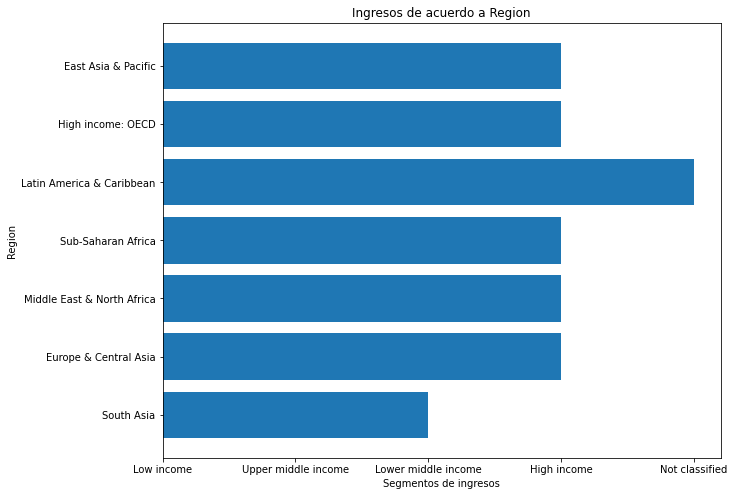

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.barh(df1['Region'], df1['Income Group'])
ax.set_title('Ingresos de acuerdo a Region')
ax.set_ylabel('Region')
ax.set_xlabel('Segmentos de ingresos')


<Axes: xlabel='WBL INDEX', ylabel='Count'>

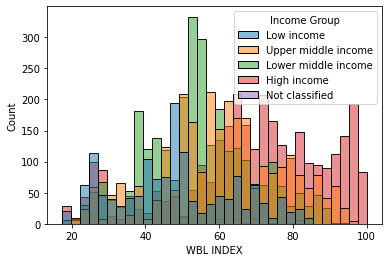

In [ ]:
sns.histplot(x = df1['WBL INDEX'], hue = df1['Income Group'], data= df1)

**Si bien en la primera grafica podemos notar que no existe una manera de afirmar si hay una verdadera relación entre clase social y desarrollo, sin cierto error, ya que Latinoamerica y el caribe no estan clasificados.
Por medio de una segunda lectura notamos que si hya relación directa con el nivel de ingresos y el desarrollo de Derechos femeninos, así los grupos que más desarrollados se encuentran son grupos de clases de  ingresos altos y medios inclinados a altos.**


## 3.Con respecto a la movilidad ¿Las mujeres han ganado más derechos?

In [ ]:
from seaborn import lmplot

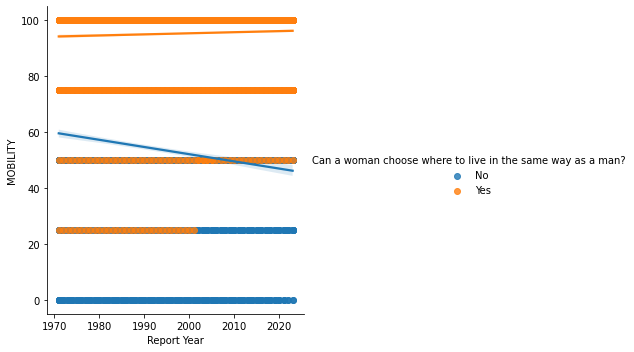

In [ ]:
lmplot(x="Report Year", y="MOBILITY", hue= "Can a woman choose where to live in the same way as a man?", data=df1)

**Tal como se puede ver, la respuesta más que con una variable de tiempo tiene que ver con la movilidad con la que cuentan estas mujeres.
Así en grupos con menor movilidad la respuesta es negativa, inversamente de lo que sucede en grupos de más movilidad.
Sin embargo se nota que hay aumento de libertad a partir de 1990, por lo que afirmamos que dependiendo la movilidad la respuesta será afirmativa o negativa.**


###CORRELACION

In [ ]:
from scipy import stats
stats.pointbiserialr(df1['MOBILITY'], df1['Report Year'])

SignificanceResult(statistic=0.14134351369613163, pvalue=4.258527682489694e-46)

**En este caso y de acuerdo al resultado podemos ver que si existe una correlacion directa en la evolucion de la movilidad y el paso del tiempo.**

## 4.¿Tienen los hombres y las mujeres los mismos derechos de propiedad sobre los bienes inmuebles?

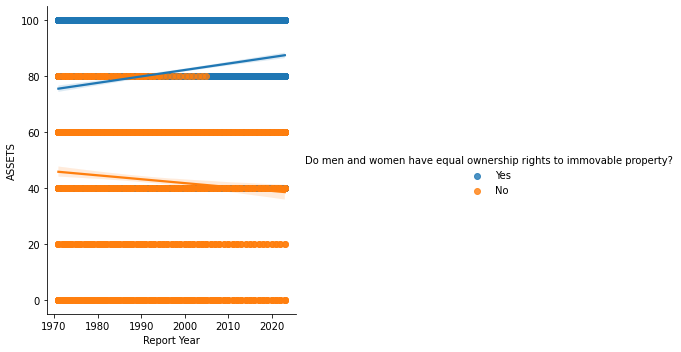

In [ ]:
lmplot(x="Report Year", y="ASSETS", hue="Do men and women have equal ownership rights to immovable property?", data=df1)

**Al igual que en la pregunta anterior, la respuesta más que con una variable de tiempo tiene que ver con la movilidad con la que cuentan estas mujeres.
A partir del 2000 solo en segmentos desarrollados altos  las mujeres afirman tener igualdad, sin embargo en la mayoria de los segmentos e historicamente sigue siendo un sector para tomar acciones y alcanzar la igualdad.**



###CORRELACION

In [ ]:
from scipy import stats
stats.pointbiserialr(df1['ASSETS'], df1['Report Year'])

SignificanceResult(statistic=0.19134892195060077, pvalue=1.1679904951654972e-83)

**Al igual que el punto anterior podemos ver que si existe una correlacion directa en el desarrollo y evolucion de los derechos de propiedad privada y el paso del tiempo.**

## 5.Con respecto a la Libertad Economica ¿Ha habido una evolución favorecedora?

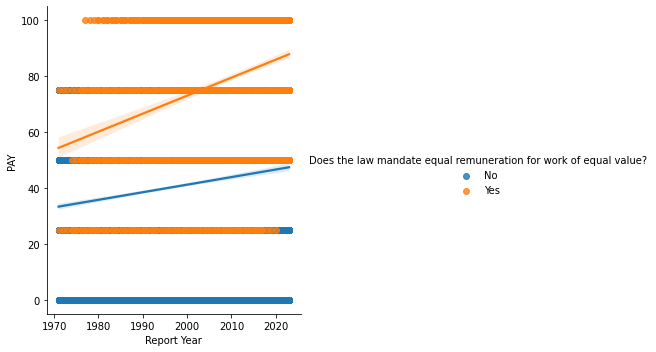

In [ ]:
lmplot(x="Report Year", y="PAY", hue="Does the law mandate equal remuneration for work of equal value?", data=df1)

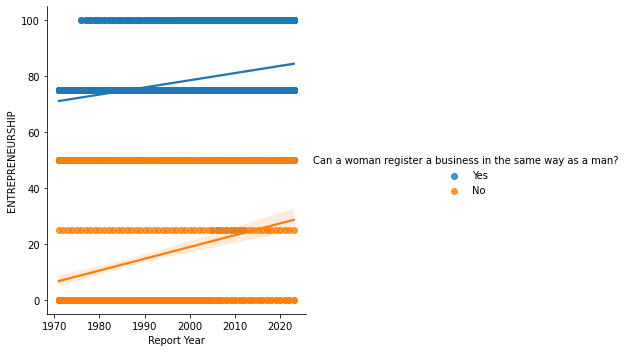

In [ ]:
lmplot(x="Report Year", y="ENTREPRENEURSHIP", hue="Can a woman register a business in the same way as a man?", data=df1)

**Bajo el análisis de dos puntos, si hubo una evolución favorecedora de libertades pero que ha beneficiados más a mujeres dependientes de alguna empresa, mientras que en mujeres emprendedoras independiente no hubo una evolución historica favorecedora, si excepcionalmente  en casos de desarrollo alto.**



###CORRELACION

In [ ]:
matthews_corrcoef(df1['PAY'], df1['ENTREPRENEURSHIP'])

0.04203474792559552

**El resultado de la correlacion nos demuestra que la relacion si bien no llega a ser inversamente proporcional pero no existe la correlacion perfecta entre estas variables.

## 6.¿La edad a la que hombres y mujeres pueden jubilarse con pensión completa es la misma?

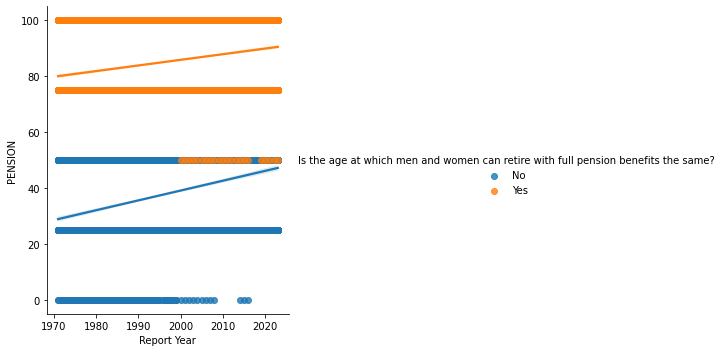

In [ ]:
lmplot(x="Report Year", y="PENSION", hue="Is the age at which men and women can retire with full pension benefits the same?", data=df1)

**La respuesta es parcialmente afirmativa, ya que también depende de que sector se trate. En el 20% correspondiente a los menos desarrollados la edad continua siendo distinta.**


#MACHINE LEARNIG REGRESION LINEAR
PREDICCION DE INDICE WBL

In [7]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import numpy as np

In [8]:
X = df1[['MOBILITY', 'PENSION', 'MARRIAGE','WORKPLACE']]
y = df1['WBL INDEX']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [11]:
regressor.coef_

array([0.179077  , 0.15681861, 0.20197522, 0.26377961])

In [12]:
regressor.intercept_

11.483380192075806

In [13]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
MOBILITY,0.179077
PENSION,0.156819
MARRIAGE,0.201975
WORKPLACE,0.263780


In [14]:
y_pred = regressor.predict(X_test)
y_pred

array([36.47620886, 56.06405347, 56.06405347, ..., 23.80123575,
       43.82650088, 56.06405347])

In [ ]:
y_test

1121    22.500
318     55.625
9133    50.000
1149    61.250
33      26.250
         ...  
964     55.000
4731    67.500
605     26.250
5684    41.875
8861    58.125
Name: WBL INDEX, Length: 2014, dtype: float64

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df['Sesgo']=df.Actual -df.Predicted
df['Error_porc']=((df.Actual -df.Predicted)/df.Actual) *100
df

,Actual,Predicted,Sesgo,Error_porc
1121,22.500,36.476209,-13.976209,-62.116484
318,55.625,56.064053,-0.439053,-0.789310
9133,50.000,56.064053,-6.064053,-12.128107
1149,61.250,63.348524,-2.098524,-3.426162
33,26.250,30.514765,-4.264765,-16.246724
...,...,...,...,...
964,55.000,52.024549,2.975451,5.409911
4731,67.500,56.064053,11.435947,16.942143
605,26.250,23.801236,2.448764,9.328626
5684,41.875,43.826501,-1.951501,-4.660301


#MACHINE LEARNIG CLASIFICACION PREDICCION
VARIABLES ASSETS VS WBL INDEX

In [35]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [50]:
X = df1[['WBL INDEX']]
y = df1['ASSETS']

In [51]:
y

0         40
1         40
2         40
3         40
4         40
        ... 
10065    100
10066    100
10067    100
10068    100
10069    100
Name: ASSETS, Length: 10070, dtype: int64

In [52]:
 y.values.reshape(-1,1)

array([[ 40],
       [ 40],
       [ 40],
       ...,
       [100],
       [100],
       [100]])

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),train_size= 0.75,\
                                                    random_state = 42,shuffle=True)

In [54]:
SVC?

In [55]:
modelo = SVC(C=0.1,kernel='sigmoid',random_state=42, verbose= True)
modelo.fit(X_train, y_train)

[LibSVM]

SVC(C=0.1, kernel='sigmoid', random_state=42, verbose=True)

In [56]:
y_test_pred = modelo.predict(X_test)

In [57]:
X_test

,WBL INDEX
1121,22.500
318,55.625
9133,50.000
1149,61.250
33,26.250
...,...
1139,38.125
7754,67.500
2231,63.125
2164,81.250


In [44]:
y_test_pred

array([100, 100, 100, ..., 100, 100, 100])

In [64]:
from sklearn.tree import DecisionTreeClassifier
arbol_de_decision = DecisionTreeClassifier(max_depth=4, random_state = 42)

In [65]:
arbol_de_decision.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

Accuracy

In [66]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_test_pred)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.4765687053216839


Matriz de confusion

In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[   0,    0,    0,    0,    0,  103],
       [   0,    0,    0,    0,    0,   60],
       [   0,    0,    0,    0,    0,  494],
       [   0,    0,    0,    0,    0,  367],
       [   0,    0,    0,    0,    0,  294],
       [   0,    0,    0,    0,    0, 1200]])

Clasificacion

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       103
          20       0.00      0.00      0.00        60
          40       0.00      0.00      0.00       494
          60       0.00      0.00      0.00       367
          80       0.00      0.00      0.00       294
         100       0.48      1.00      0.65      1200

    accuracy                           0.48      2518
   macro avg       0.08      0.17      0.11      2518
weighted avg       0.23      0.48      0.31      2518



CURVA ROC

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_score1 = arbol_de_decision.predict_proba(X_test)[:,1]
y_score1

array([0.53448276, 0.02413793, 0.04485488, ..., 0.00733945, 0.        ,
       0.        ])